In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle

In [2]:
data = np.load('./data/fashion_train.npy')

Best number of components: 89, and in terms of variance: 0.8736292603778377


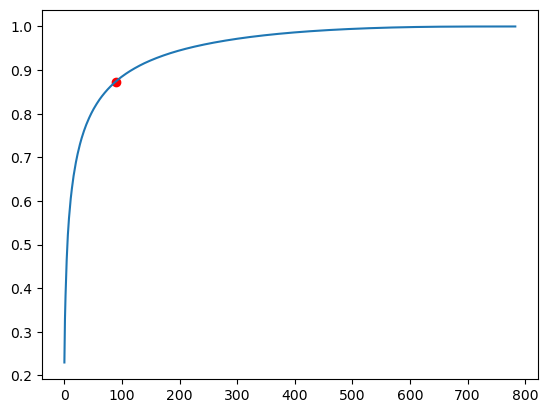

In [3]:
df_scaled = (data[:, :-1] - data[:, :-1].mean(axis=1, keepdims=True)) / data[:, :-1].std(axis=1, keepdims=True)

pca = PCA()

pca.fit(df_scaled)

cumx = np.cumsum(pca.explained_variance_ratio_)

x_original = [x for x in range(0, len(cumx))]
x_values = x_original / np.max(x_original)
y_values = cumx 

# Calculate the Euclidean distance to (0, 1)
distances = np.sqrt(x_values**2 + (y_values - 1)**2)

# Find the closest point
min_distance = np.min(distances)
min_index = np.argmin(distances)
closest_point = (x_values[min_index], y_values[min_index])

print(f'Best number of components: {min_index}, and in terms of variance: {cumx[min_index]}')

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.scatter(min_index, cumx[min_index], color='red')

In [5]:
pca = PCA(n_components=min_index)
pca.fit(df_scaled)
pickle.dump(pca, open('./Final_repo/models/pca_model.pkl', 'wb'))